In [1]:
SEMINAR_PATH = '/home/jim/PycharmProjects'
import sys
sys.path.append(SEMINAR_PATH)

import seminar
from seminar.learn.cnn_lstm import convlstm, convgru
from seminar.learn.cnn import LSTM

import os
import numpy as np
import matplotlib.pyplot as plt

from pytorch_lightning import Trainer

In [2]:
from importlib import reload
reload(seminar)

<module 'seminar' (namespace)>

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Build Network

In [4]:
trn = '/home/jim/PycharmProjects/seminar/notebooks/data/spv/trn'
val = '/home/jim/PycharmProjects/seminar/notebooks/data/spv/trn'

In [5]:
classes = np.unique(list(map(int, [x[1] for x in os.walk(trn)][0] + [x[1] for x in os.walk(val)][0])))

In [8]:
sample_image = np.load('/home/jim/PycharmProjects/seminar/notebooks/data/spv/trn/10/174_1706.npy')

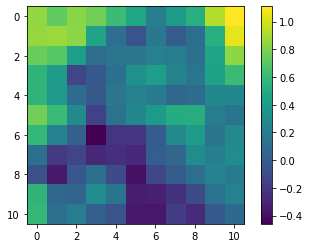

In [9]:
plt.imshow(sample_image[1,1])
plt.colorbar()

In [10]:
lstm = LSTM(in_channels=2, num_layers=5, hidden_channels=[5, 4, 3, 2, 1], 
            kernel_size=[(5, 5), (5, 5), (5, 5), (3, 3), (3, 3)],
            train_image_folder=trn,
            val_image_folder=val,
            classes=classes, n_jobs=6, batch_size=32, input_shape=sample_image[0, 0].shape)

In [ ]:
trainer = Trainer(check_val_every_n_epoch=2)
trainer.fit(lstm)